# Saudi Aramco's Financial Analysis

This notebook performs a comprehensive financial analysis of Saudi Aramco company data, including growth analysis, profitability ratios, financial position metrics, and visualizations.

## Importing Libraries

In [1]:
# Import necessary libraries for data manipulation, analysis, and visualization
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Data Loading and Exploration

In [2]:
# Load the Saudi Aramco raw data from the CSV file
saudi_aramco_raw_data = pd.read_csv('saudi_aramco_data.csv')

# Display the first few rows to understand the data structure
saudi_aramco_raw_data.head()

,Year,Company_Name,Sector,Revenue_SAR,Net_Income_SAR,Operating_Income_SAR,Total_Assets_SAR,Total_Liabilities_SAR
0,2019,Aramco,Energy,1096444000,330693000,674871000,1494126000,447891000
1,2020,Aramco,Energy,771246000,183763000,383360000,1914261000,813167000
2,2021,Aramco,Energy,1346930000,412369000,771918000,2162690000,882022000
3,2022,Aramco,Energy,2006955000,60400500,1144077000,2492924000,826777000
4,2023,Aramco,Energy,1856373000,454764000,868287000,2477940000,740848000


In [3]:
# Get a summary of the dataset including data types and non-null counts
saudi_aramco_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Year                   6 non-null      int64 
 1   Company_Name           6 non-null      object
 2   Sector                 6 non-null      object
 3   Revenue_SAR            6 non-null      int64 
 4   Net_Income_SAR         6 non-null      int64 
 5   Operating_Income_SAR   6 non-null      int64 
 6   Total_Assets_SAR       6 non-null      int64 
 7   Total_Liabilities_SAR  6 non-null      int64 
dtypes: int64(6), object(2)
memory usage: 516.0+ bytes


## Data Preparation

Note: Gross Profit was excluded from the analysis due to the absence of a clearly disclosed cost of revenue structure in Saudi Aramco's financial statements.

In [4]:
# Sort the data by year to ensure chronological order
saudi_aramco_raw_data = saudi_aramco_raw_data.sort_values(by='Year').reset_index(drop=True)

# Define the numeric columns that need to be converted
numeric_cols = ['Revenue_SAR', 'Net_Income_SAR','Operating_Income_SAR','Total_Assets_SAR', 'Total_Liabilities_SAR']

# Convert the specified columns to numeric type, coercing errors to NaN
saudi_aramco_raw_data[numeric_cols] = saudi_aramco_raw_data[numeric_cols].apply(pd.to_numeric, errors='coerce').astype(float)

# Display the prepared data
saudi_aramco_raw_data

,Year,Company_Name,Sector,Revenue_SAR,Net_Income_SAR,Operating_Income_SAR,Total_Assets_SAR,Total_Liabilities_SAR
0,2019,Aramco,Energy,1.096444e+09,330693000.0,6.748710e+08,1.494126e+09,447891000.0
1,2020,Aramco,Energy,7.712460e+08,183763000.0,3.833600e+08,1.914261e+09,813167000.0
2,2021,Aramco,Energy,1.346930e+09,412369000.0,7.719180e+08,2.162690e+09,882022000.0
3,2022,Aramco,Energy,2.006955e+09,60400500.0,1.144077e+09,2.492924e+09,826777000.0
4,2023,Aramco,Energy,1.856373e+09,454764000.0,8.682870e+08,2.477940e+09,740848000.0
5,2024,Aramco,Energy,1.801674e+09,398422000.0,7.746250e+08,2.423630e+09,772275000.0


In [5]:
# Create a copy of the raw data for analysis to avoid modifying the original
saudi_aramco_new_data = saudi_aramco_raw_data.copy()

## Growth Analysis

In [6]:
# Calculate Year-over-Year Growth for Revenue
saudi_aramco_new_data['Revenue_Growth_%'] = saudi_aramco_new_data['Revenue_SAR'].pct_change() * 100

# Define a function to calculate Compound Annual Growth Rate (CAGR)
def calculate_cagr(start_value, end_value, periods):
    return ((end_value / start_value) ** (1 / periods) - 1) * 100

# Calculate and display the CAGR for Revenue
cagr_revenue = calculate_cagr(saudi_aramco_new_data['Revenue_SAR'].iloc[0], saudi_aramco_new_data['Revenue_SAR'].iloc[-1], len(saudi_aramco_new_data)-1)
print(f"Revenue CAGR: {cagr_revenue:.2f}%")

Revenue CAGR: 10.44%


## Profitability Ratios

In [7]:
# Calculate Operating Margin as a percentage
saudi_aramco_new_data['Operating_Margin_%'] = (saudi_aramco_new_data['Operating_Income_SAR'] / saudi_aramco_new_data['Revenue_SAR']) * 100

# Calculate Net Profit Margin as a percentage
saudi_aramco_new_data['Net_Profit_Margin_%'] = (saudi_aramco_new_data['Net_Income_SAR'] / saudi_aramco_new_data['Revenue_SAR']) * 100

# Display the profitability ratios
print(saudi_aramco_new_data[['Year', 'Operating_Margin_%', 'Net_Profit_Margin_%']])

   Year  Operating_Margin_%  Net_Profit_Margin_%
0  2019           61.550886            30.160501
1  2020           49.706579            23.826769
2  2021           57.309437            30.615474
3  2022           57.005613             3.009559
4  2023           46.773305            24.497447
5  2024           42.994737            22.113990


## Financial Position

In [8]:
# Calculate Leverage Ratio: Liabilities to Assets as a percentage
saudi_aramco_new_data['Liabilities_to_Assets_Ratio'] = (saudi_aramco_new_data['Total_Liabilities_SAR'] / saudi_aramco_new_data['Total_Assets_SAR']) * 100

# Calculate Asset Turnover Ratio
saudi_aramco_new_data['Asset_Turnover_Ratio'] = saudi_aramco_new_data['Revenue_SAR'] / saudi_aramco_new_data['Total_Assets_SAR']

# Display the financial position ratios
print(saudi_aramco_new_data[['Year', 'Liabilities_to_Assets_Ratio', 'Asset_Turnover_Ratio']])

   Year  Liabilities_to_Assets_Ratio  Asset_Turnover_Ratio
0  2019                    29.976789              0.733836
1  2020                    42.479422              0.402895
2  2021                    40.783561              0.622803
3  2022                    33.164950              0.805061
4  2023                    29.897738              0.749160
5  2024                    31.864393              0.743378


## Visualizations

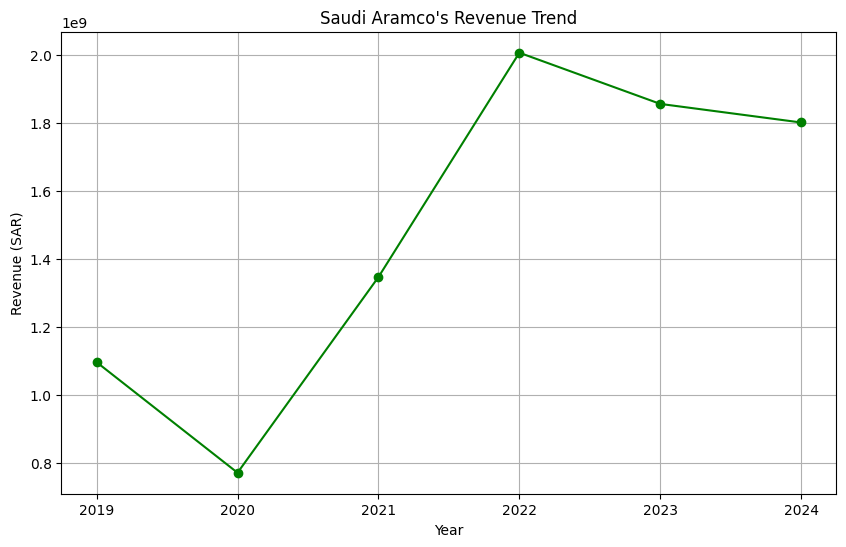

In [9]:
# Visualize Revenue Trend over Years
plt.figure(figsize=(10, 6))
plt.plot(saudi_aramco_new_data["Year"], saudi_aramco_new_data["Revenue_SAR"], marker='o', linestyle='-', color='green')
plt.title("Saudi Aramco's Revenue Trend")
plt.xlabel("Year")
plt.ylabel("Revenue (SAR)")
plt.grid(True)
plt.show()

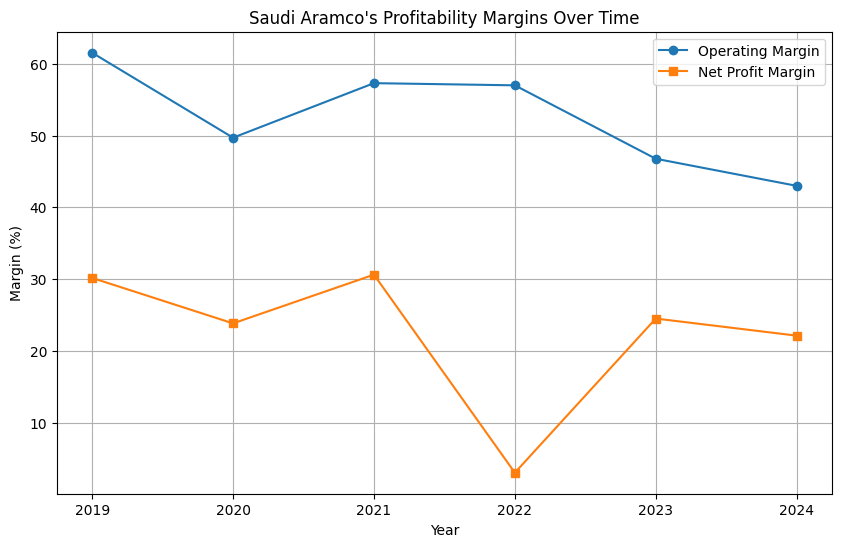

In [10]:
# Visualize Profitability Margins over Years
plt.figure(figsize=(10, 6))
plt.plot(saudi_aramco_new_data["Year"], saudi_aramco_new_data["Operating_Margin_%"], label="Operating Margin", marker='o')
plt.plot(saudi_aramco_new_data["Year"], saudi_aramco_new_data["Net_Profit_Margin_%"], label="Net Profit Margin", marker='s')
plt.legend()
plt.title("Saudi Aramco's Profitability Margins Over Time")
plt.xlabel("Year")
plt.ylabel("Margin (%)")
plt.grid(True)
plt.show()

## Saving Analysis Results

In [11]:
# Save the analysis results to a CSV file
saudi_aramco_new_data.to_csv('saudi_aramco_analysis_results.csv', index=False)
print("Analysis results saved to 'saudi_aramco_analysis_results.csv'")

Analysis results saved to 'saudi_aramco_analysis_results.csv'


## Conclusion

This notebook has provided a comprehensive analysis of Saudi Aramco's financial data, including growth metrics, profitability ratios, financial position, and visualizations. The results have been saved for further use.